# 1 Vectors and Data Frames 

In [59]:
scottish.lakes <- read.csv('lakes.csv')
#keep metric columns, rename headings for easy referencing
scottish.lakes <- scottish.lakes[c(1,2,4,6,8,10)]
colnames(scottish.lakes) <- c("Loch","Volume","Area","Length","MaxDepth","MeanDepth")

scottish.lakes

Loch,Volume,Area,Length,MaxDepth,MeanDepth
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Loch Ness,7.45,56.0,36.2,227,132.0
Loch Lomond,2.60,71.0,36.0,190,37.0
Loch Morar,2.30,26.7,18.8,310,87.0
Loch Tay,1.60,26.4,23.0,150,60.6
Loch Awe,1.20,39.0,41.0,94,32.0
Loch Maree,1.09,28.6,20.0,114,38.0
Loch Ericht,1.08,18.6,23.0,156,57.6
Loch Lochy,1.07,16.0,16.0,162,70.0
Loch Rannoch,0.97,19.0,15.7,134,51.0


In [60]:
# 1 max volume and area
Vol <- scottish.lakes$Volume

maxVol <- max(Vol)
indexMaxVol <- which.max(Vol)
lakeMaxVol <- scottish.lakes[indexMaxVol,1]

minVol <- min(Vol)
indexMinVol <- which.min(Vol)
lakeMinVol <- scottish.lakes[indexMinVol,1]

Are <- scottish.lakes$Area

maxArea <- max(Are)
indexMaxArea <- which.max(Are)
lakeMaxArea <- scottish.lakes[indexMaxArea,1]

minArea <- min(Are)
indexMinArea <- which.min(Are)
lakeMinArea <- scottish.lakes[indexMinArea,1]

message(paste("The lake with the maximum volume is", lakeMaxVol,":",maxVol,"km^3"))

message(paste("The lake with the minimum volume is", lakeMinVol,":",minVol,"km^3"))

message(paste("The lake with the maximum area is", lakeMaxArea,":",maxArea,"km^2"))

message(paste("The lake with the minimum area is", lakeMinArea,":",minArea,"km^2"))



The lake with the maximum volume is Loch Ness : 7.45 km^3

The lake with the minimum volume is Loch Shin : 0.35 km^3

The lake with the maximum area is Loch Lomond : 71 km^2

The lake with the minimum area is Loch Katrine : 12.4 km^2



In [61]:
# 2 order entries for lake area
lakesArea <- scottish.lakes[order(scottish.lakes$Area, decreasing = TRUE),]
print(lakesArea)

cat("The largest area lake is",lakesArea[1,1],":",lakesArea[1,3],"km^2")
cat("The second largest area lake is",lakesArea[2,1],":",lakesArea[2,3],"km^2")

           Loch Volume Area Length MaxDepth MeanDepth
2   Loch Lomond   2.60 71.0   36.0      190      37.0
1     Loch Ness   7.45 56.0   36.2      227     132.0
5      Loch Awe   1.20 39.0   41.0       94      32.0
6    Loch Maree   1.09 28.6   20.0      114      38.0
3    Loch Morar   2.30 26.7   18.8      310      87.0
4      Loch Tay   1.60 26.4   23.0      150      60.6
13    Loch Shin   0.35 22.5   27.8       49      15.5
10   Loch Shiel   0.79 19.5   28.0      128      40.0
9  Loch Rannoch   0.97 19.0   15.7      134      51.0
7   Loch Ericht   1.08 18.6   23.0      156      57.6
8    Loch Lochy   1.07 16.0   16.0      162      70.0
12  Loch Arkaig   0.75 16.0   19.3      109      46.5
11 Loch Katrine   0.77 12.4   12.9      151      43.4
The largest area lake is Loch Lomond : 71 km^2The second largest area lake is Loch Ness : 56 km^2

In [62]:
# 3 area of scotland covered by water
lakeArea <- sum(scottish.lakes$Area)

cat("The area covered by lakes is:",lakeArea)

The area covered by lakes is: 371.7

# 2 Crude Oil Production

The highest price recored is, 111.6697 US dollers per barrel. In year, 2012 .

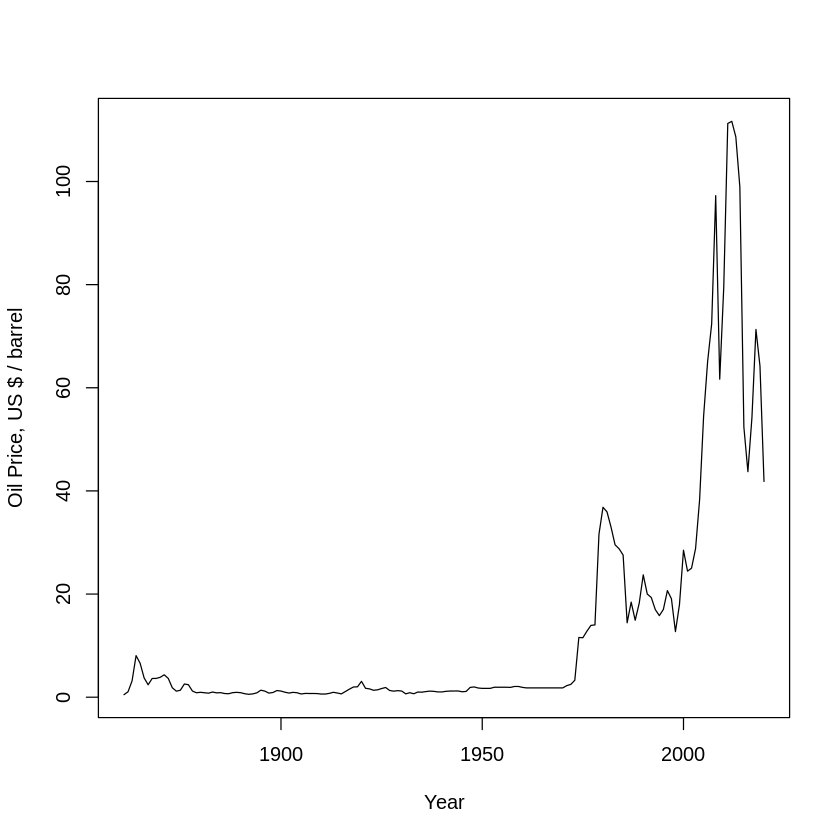

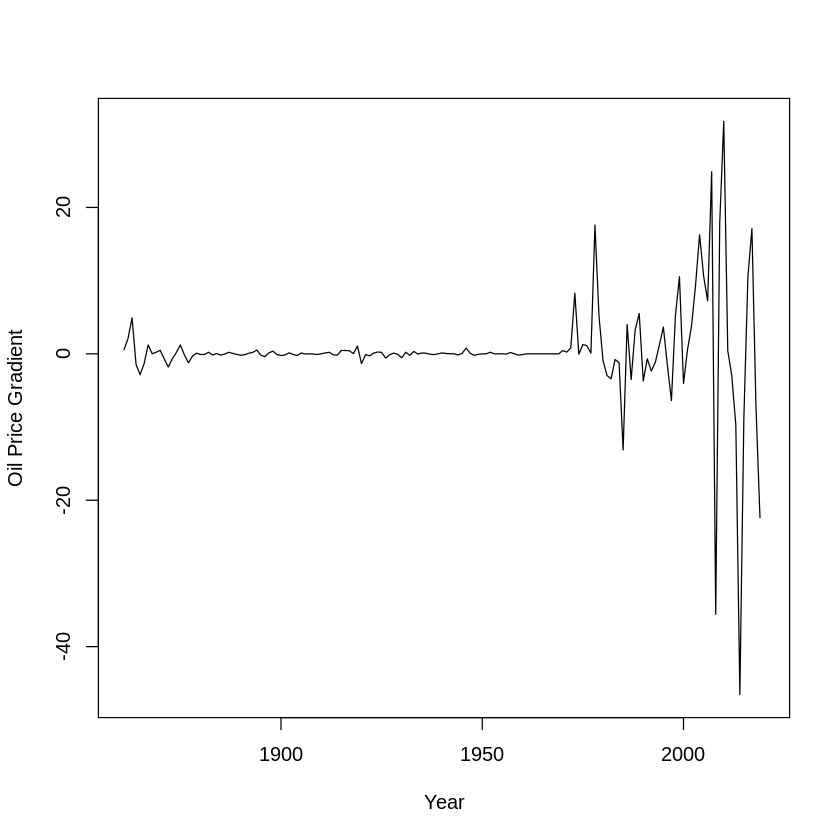

In [63]:
# Ex2 Cruid Oil Production

#1
oilp <- read.csv("crude-oil-prices.csv")
#take two relivant columbs
oilp <- oilp[,c(3,4)]
colnames(oilp) <- c("year","oilPrice")

#2
Year <- oilp$year
Oil_Price <- oilp$oilPrice

plot(Year,Oil_Price, type = 'l', xlab = "Year", ylab = "Oil Price, US $ / barrel")

#3
maxRow <- oilp[which.max(Oil_Price),]
maxP <- maxRow[,2]
maxPyear <- maxRow[,1]

cat("The highest price recored is,",maxP,"US dollers per barrel. In year,",maxPyear,".")

#4
derivative <- function(data){
    der <- vector()
    for (i in 0:length(data)){
        der[i] <- data[i+1] - data[i]
    }
    return(der)
}
plot(Year, derivative(Oil_Price),type = 'l',xlab = "Year",ylab = "Oil Price Gradient")

# 3 World Coal Production

In [64]:
install.packages('tibble')
library('tibble')

coal <- as_tibble(read.csv("coal-production.csv"))
colnames(coal) <- c('country', 'code','year','TWh_coal')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [65]:
cat('The number of countries available is:', length(unique(coal$country)))

The number of countries available is: 200

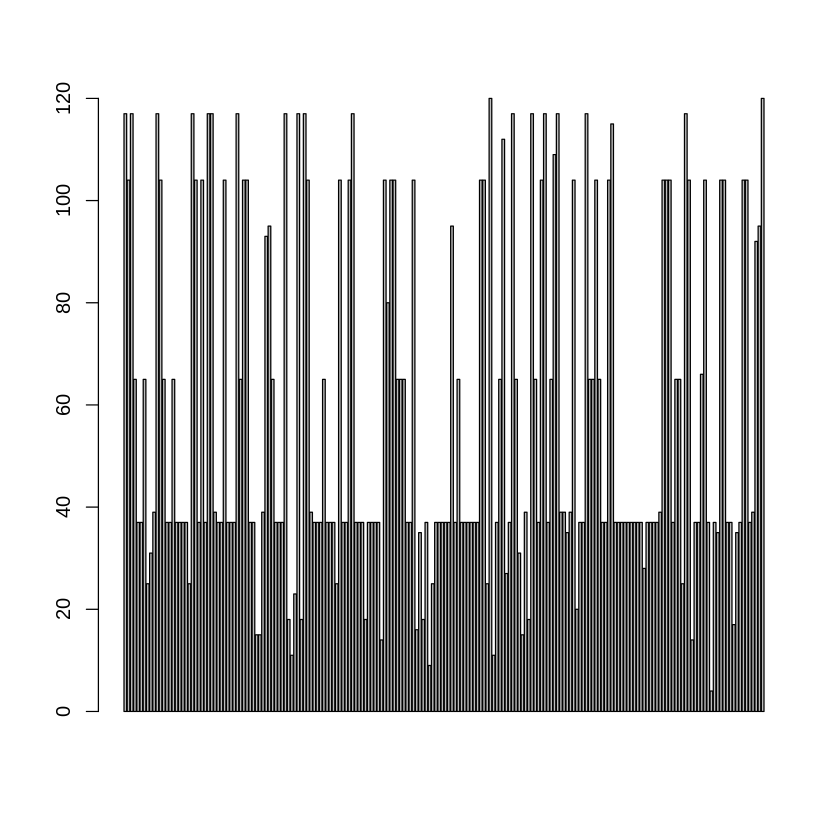

In [66]:
#2 producing the barplot for of times countries are entered
countries <- unique(coal$country)
entries <- vector()
for (i in 1:length(countries)){
    mask <- coal$country == countries[i]
    #print(countries[i])
    #print(length(countries[mask]))
    entries[i] <- length(countries[mask])
}
barplot(entries)



In [67]:
#3 top 5 coal producting countries after 1970

yearMask <- coal$year >= 1970
coalAfter <- coal[yearMask,]
production <- vector()
for (i in 1:length(countries)){    
    countryMask <- coalAfter$country == countries[i]
    production[i] <- sum(coalAfter[countryMask,]$TWh_coal)
}
aggregate(df_tib$"Coal production (TWh)",list(df_tib$Entity), sum)
#country production after 1970, CPA
CPA <- data.frame(countries,production)

ordered <- CPA[order(CPA$production),]
cat('The top five entities for coal production are:')
topfive <- tail(ordered, 5)
topfive



ERROR: Error in aggregate(df_tib$"Coal production (TWh)", list(df_tib$Entity), : object 'df_tib' not found


In [ ]:
#4 for the 5 top Countries, create a plot of production as a function of time
for (i in 1:5){
    currentCountry <- topfive['countries'][i,]
    countryMask <- coalAfter$country == currentCountry
    countrydf <- coalAfter[countryMask,]
    plot(countrydf$year,countrydf$TWh_coal,main = currentCountry,xlab = 'year', ylab = 'Coal Production TWh')
}

#5 cumulative sum of the world coal procuction
countryMask <- coalAfter$country == 'World'
countrydf <- coalAfter[countryMask,]
plot(countrydf$year,cumsum(countrydf$TWh_coal),main = 'Cumulative World Coal Production',xlab = 'year', ylab = 'Coal Production TWh')


# 4 Vaccination Data

In [ ]:
install.packages('dplyr')
library('dplyr')

In [ ]:
vacc <- read.csv('vaccinations-by-manufacturer.csv')
print(vacc)
italy <- filter(vacc,location == 'Italy')
vacc[location == 'Unites States',]

In [ ]:
#2 
vaccine <- unique(italy$vaccine)

for (vac in vaccine){
    maskVac <- italy$vaccine == vac
    italyVac <- italy[maskVac,]
    startDate <- italyVac$date[1]
    plot(1:length(italyVac$date), cumsum(as.numeric(italyVac$total_vaccinations)), xlab = c('Time in Days since ', startDate,'.')
         ,ylab = 'Total Number of Vaccines Given', main = vac)    
}



In [ ]:
dates <- unique(italy$date)
vacPerDay <- vector()
for (i in 1:length(dates)){
    dateMask <- italy$date == dates[i]
    italyDat <- italy[dateMask,]
    vacPerDay[i] <- sum(italyDat$total_vaccinations) 
}

plot(1:length(dates),vacPerDay, main = 'Vacciations per day in Italy', xlab = c('Days Since ',dates[1])
    ,ylab = 'Number of Vaccinations in Each Day')

cat("I think for some intermittant days there is a manufacturer missing from the data. This causes the sudden drops.")

## Same for Germany

In [ ]:
germany <- filter(vacc,location == 'Germany')
head(germany)

vaccine <- unique(germany$vaccine)

for (vac in vaccine){
    maskVac <- germany$vaccine == vac
    germanyVac <- germany[maskVac,]
    startDate <- germanyVac$date[1]
    plot(1:length(germanyVac$date), cumsum(as.numeric(germanyVac$total_vaccinations)), xlab = c('Time in Days since ', startDate,'.')
         ,ylab = 'Total Number of Vaccines Given', main = vac)    
}


dates <- unique(germany$date)
vacPerDay <- vector()
for (i in 1:length(dates)){
    dateMask <- germany$date == dates[i]
    germanyDat <- germany[dateMask,]
    vacPerDay[i] <- sum(germanyDat$total_vaccinations) 
}

plot(1:length(dates),vacPerDay, main = 'Vacciations per day in Germany', xlab = c('Days Since ',dates[1])
    ,ylab = 'Number of Vaccinations in Each Day')

## Same for USA

,location,date,vaccine,total_vaccinations
,<chr>,<chr>,<chr>,<int>
1,United States,2021-01-12,Moderna,3835859
2,United States,2021-01-12,Pfizer/BioNTech,5488697
3,United States,2021-01-13,Moderna,4249795
4,United States,2021-01-13,Pfizer/BioNTech,6025872
5,United States,2021-01-15,Moderna,5122662
6,United States,2021-01-15,Pfizer/BioNTech,7153268


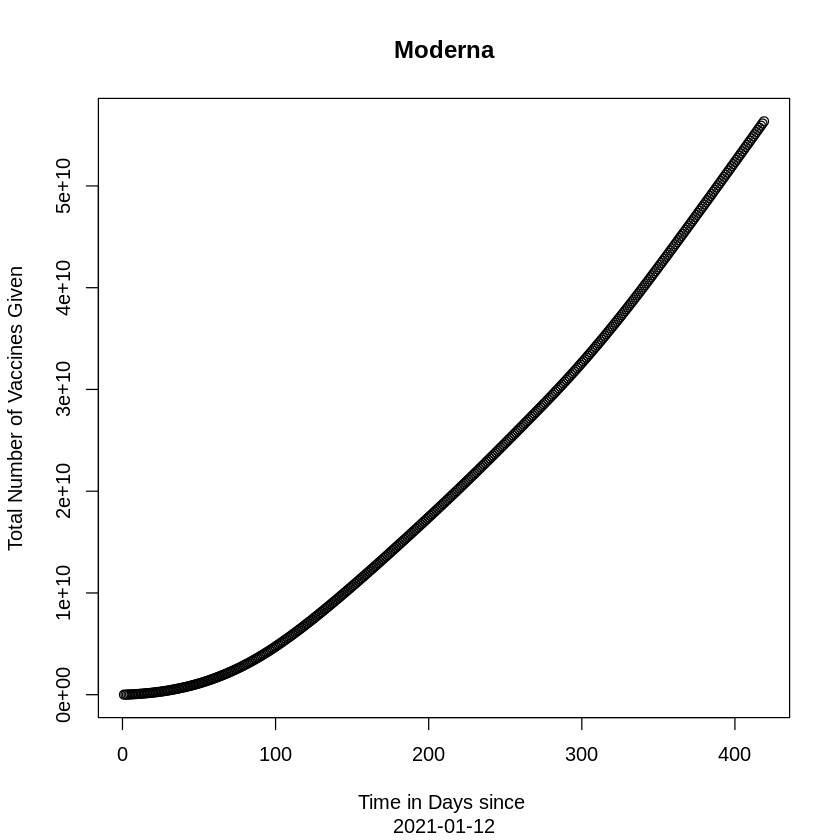

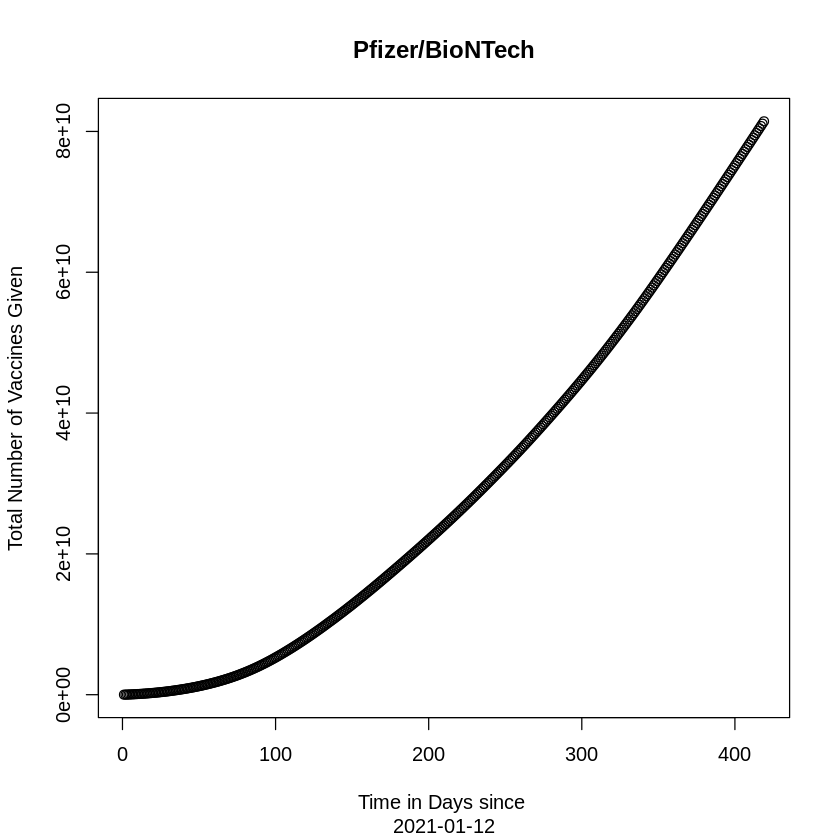

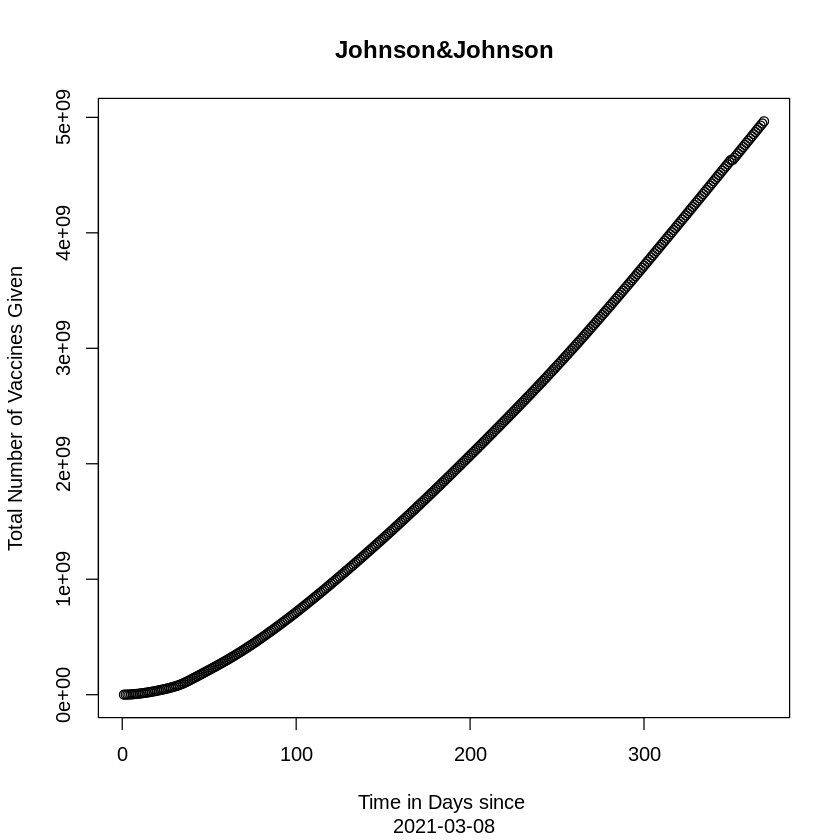

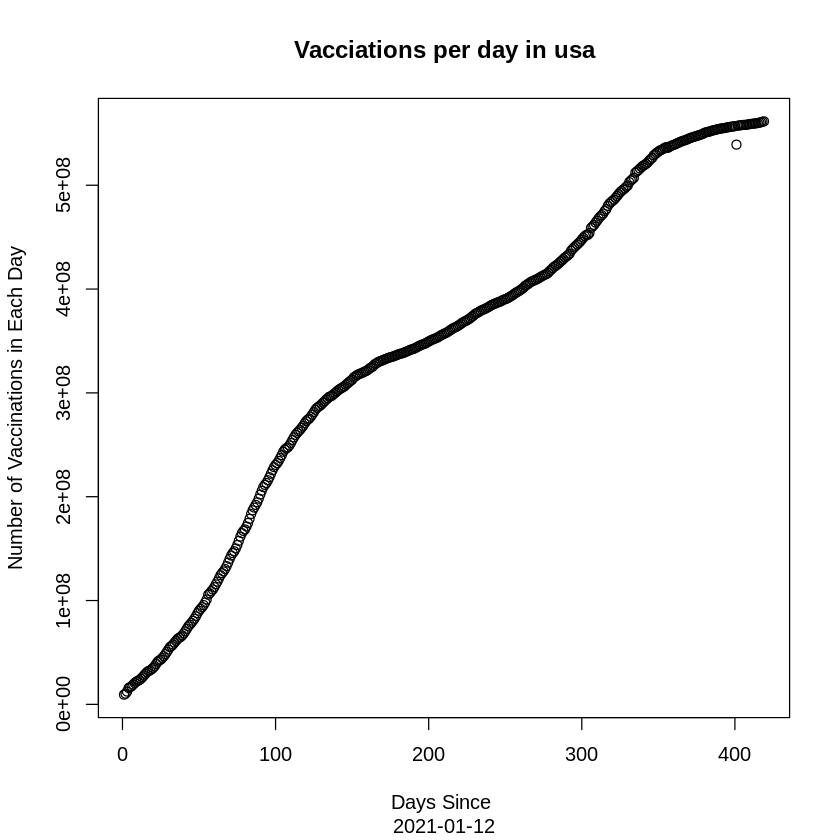

In [68]:
usa <- filter(vacc,location == 'United States')
head(usa)

vaccine <- unique(usa$vaccine)

for (vac in vaccine){
    maskVac <- usa$vaccine == vac
    usaVac <- usa[maskVac,]
    startDate <- usaVac$date[1]
    plot(1:length(usaVac$date), cumsum(as.numeric(usaVac$total_vaccinations)), xlab = c('Time in Days since ', startDate,'.')
         ,ylab = 'Total Number of Vaccines Given', main = vac)    
}


dates <- unique(usa$date)
vacPerDay <- vector()
for (i in 1:length(dates)){
    dateMask <- usa$date == dates[i]
    usaDat <- usa[dateMask,]
    vacPerDay[i] <- sum(usaDat$total_vaccinations) 
}

plot(1:length(dates),vacPerDay, main = 'Vacciations per day in usa', xlab = c('Days Since ',dates[1])
    ,ylab = 'Number of Vaccinations in Each Day')

In [69]:
vacc[location = '']

ERROR: Error in `[.data.frame`(vacc, location = ""): unused argument (location = "")


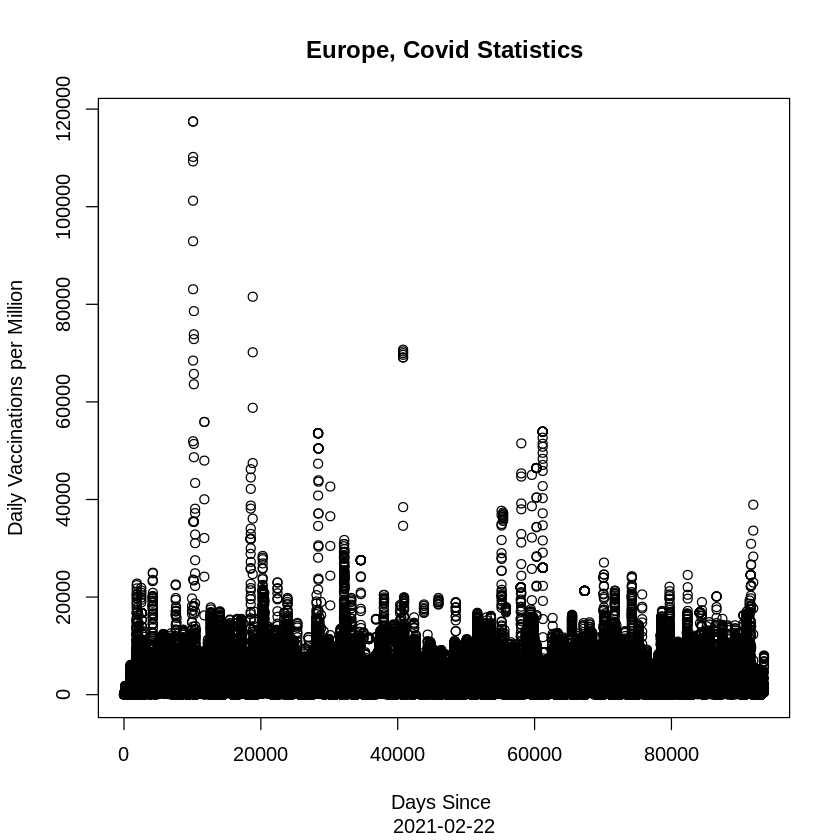

In [70]:
#daily vaccinations per million in europ 
vaccin <- read.csv('vaccinations.csv')

isoMask <- "OWID_EUR" == vaccin$iso_code

europe <- vaccin[isoMask,]

date <- vaccin$date 
vacpermil <- vaccin$daily_vaccinations_per_million

#dev.new(width=5, height=4, unit="in")
plot(1:length(vacpermil),vacpermil,xlab = c("Days Since ",date[1]),ylab = "Daily Vaccinations per Million", main = "Europe, Covid Statistics")

Perhaps 30% of the population don't want to be vaccinated

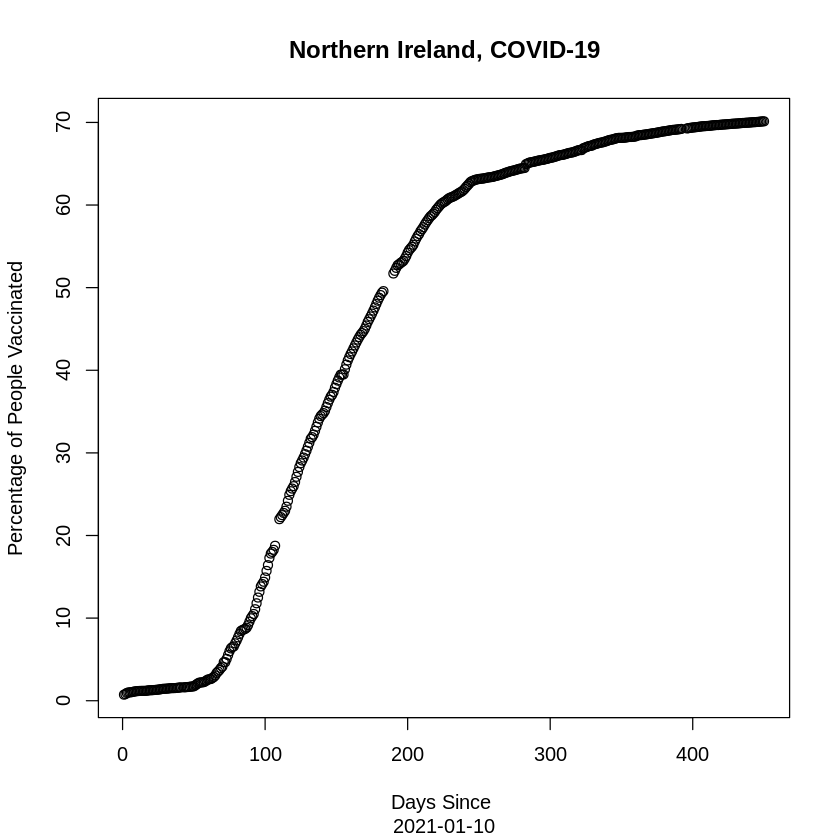

In [71]:
# Percentage of people vaccinated
NI <- vaccin[grepl('Northern Ireland',vaccin$location),]
population <- 1.9e+6 #approximatly

pplfv <- NI$people_fully_vaccinated
vacPerc <- (pplfv/population)*100


plot(vacPerc, xlab = c("Days Since ",NI$date[1]),ylab = "Percentage of People Vaccinated", main = "Northern Ireland, COVID-19")

cat("Perhaps 30% of the population don't want to be vaccinated")

Perhaps 25% of the population don't want to be vaccinated

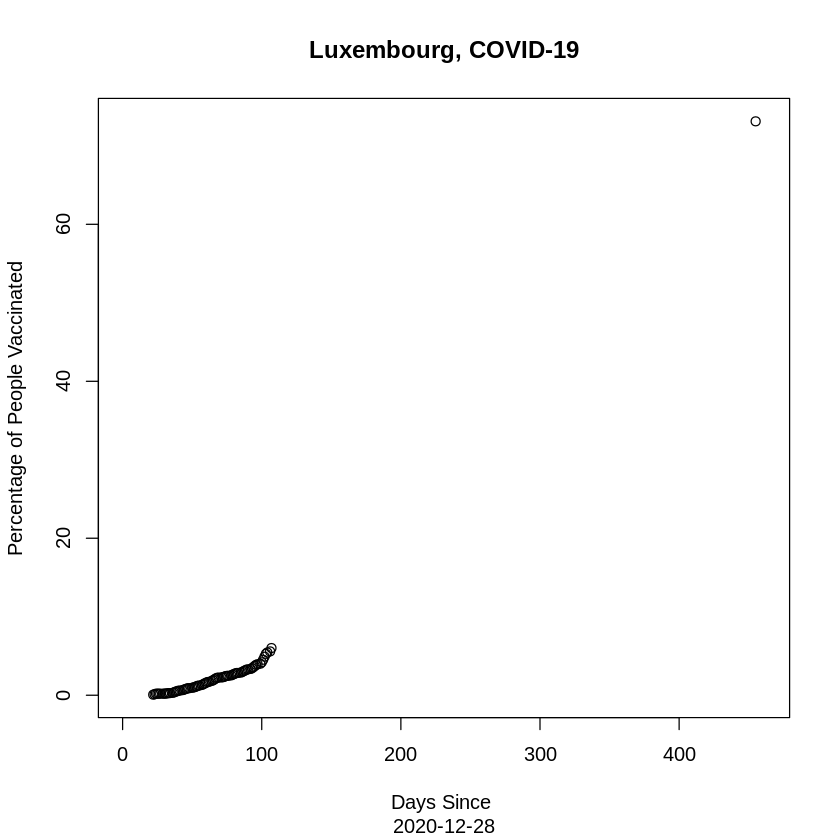

In [72]:
# Percentage of people vaccinated
lux <- vaccin[grepl('Luxembourg',vaccin$location),]
population <- 630000 #approximatly

pplfv <- lux$people_fully_vaccinated
vacPerc <- (pplfv/population)*100


plot(vacPerc, xlab = c("Days Since ",lux$date[1]),ylab = "Percentage of People Vaccinated", main = "Luxembourg, COVID-19")

cat("Perhaps 25% of the population don't want to be vaccinated")

Perhaps 20% of the population don't want to be vaccinated

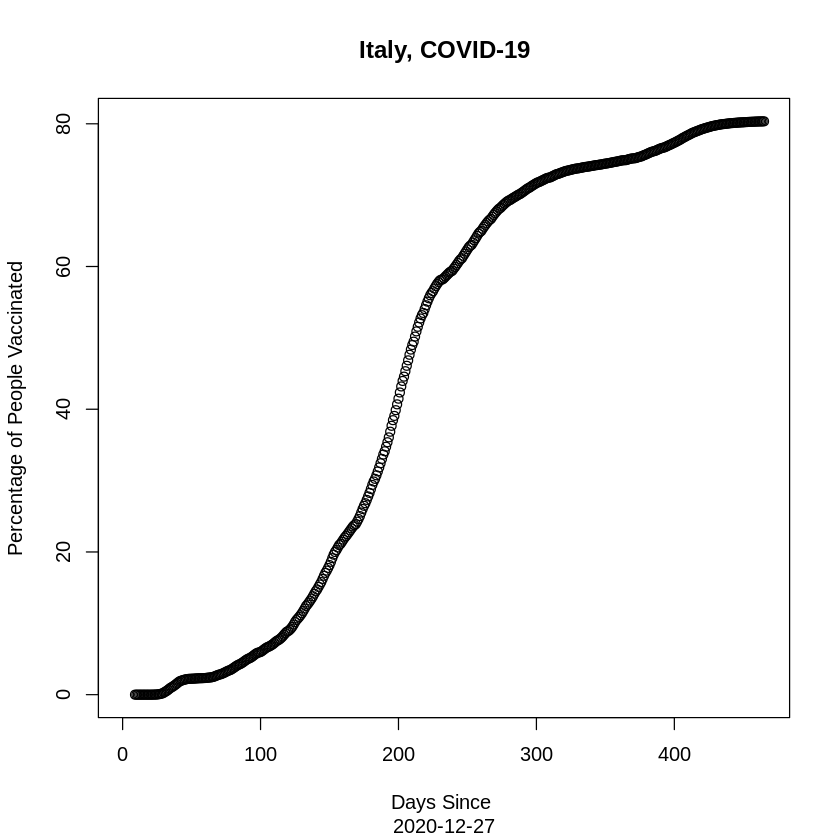

In [73]:
# Percentage of people vaccinated
it <- vaccin[grepl('Italy',vaccin$location),]
population <- 59.55e+6 #approximatly

pplfv <- it$people_fully_vaccinated
vacPerc <- (pplfv/population)*100


plot(vacPerc, xlab = c("Days Since ",it$date[1]),ylab = "Percentage of People Vaccinated", main = "Italy, COVID-19")

cat("Perhaps 20% of the population don't want to be vaccinated")

Perhaps 25% of the population don't want to be vaccinated

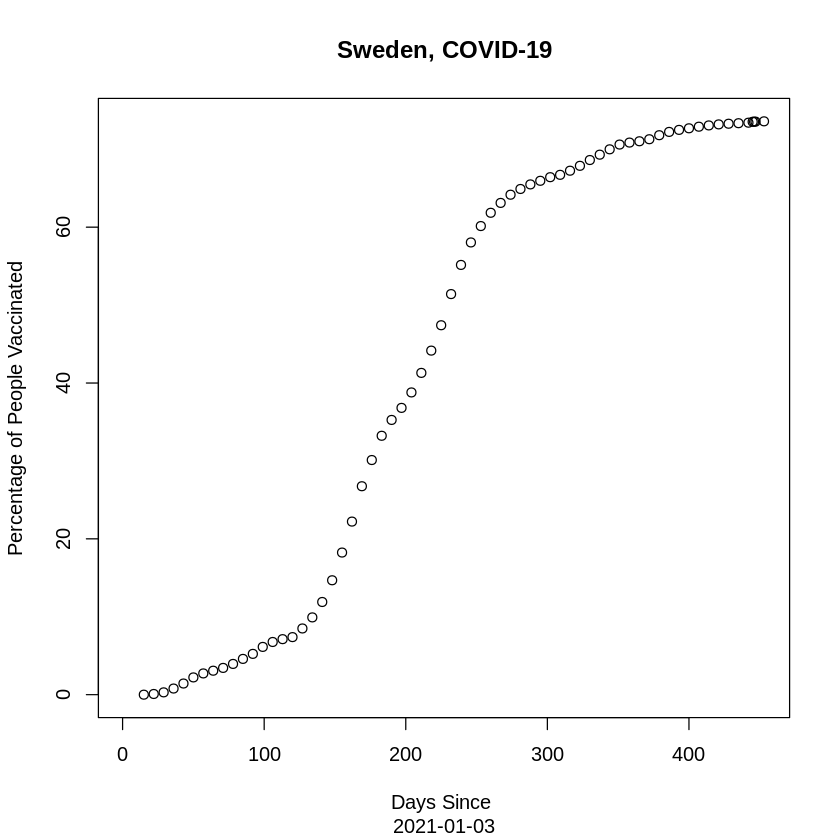

In [74]:
# Percentage of people vaccinated
swe <- vaccin[grepl('Sweden',vaccin$location),]
population <- 10.353e+6 #approximatly

pplfv <- swe$people_fully_vaccinated
vacPerc <- (pplfv/population)*100


plot(vacPerc, xlab = c("Days Since ",swe$date[1]),ylab = "Percentage of People Vaccinated", main = "Sweden, COVID-19")

cat("Perhaps 25% of the population don't want to be vaccinated")

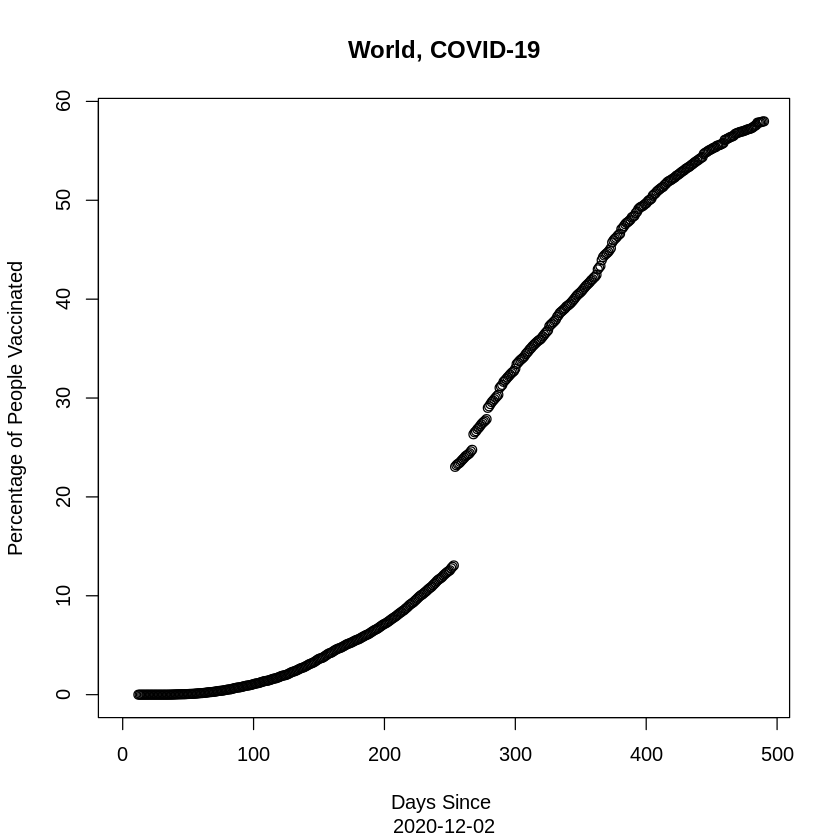

In [75]:
# Percentage of people vaccinated
wor <- vaccin[grepl('World',vaccin$location),]
population <- 7.9e+9 #approximatly

pplfv <- wor$people_fully_vaccinated
vacPerc <- (pplfv/population)*100


plot(vacPerc, xlab = c("Days Since ",wor$date[1]),ylab = "Percentage of People Vaccinated", main = "World, COVID-19")
